In [ ]:
# Présentation
# Encodage des Images statiques en Spikes

In [18]:
import snntorch as snn
import torch
import matplotlib.pyplot as plt
from snntorch import spikegen
import snntorch.spikeplot as splt
from IPython.display import HTML
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image

In [19]:
# Paramètres pour l'encodage et l'animation
num_steps = 50  
duration_in_seconds = 5  
interval = (duration_in_seconds / num_steps) * 1000  # en ms

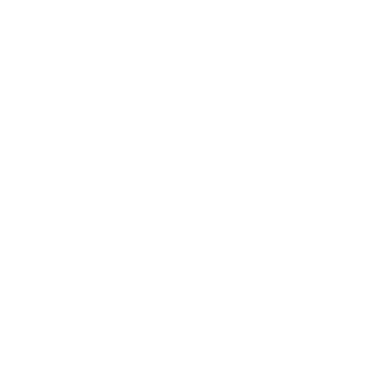

In [20]:
image_path = '/home/deudo/spiking/emotion_recognition_cnn_snn/data/test/happy/PublicTest_92086904.jpg'

# Appliquer des transformations à l'image (grayscale, redimensionnement, normalisation)
transform = transforms.Compose([
    transforms.Resize((48, 48)),  
    transforms.Grayscale(),       
    transforms.ToTensor(),  
    transforms.Normalize((0.5,), (0.5,))  # Normalisation entre -1 et 1
])

# Charger et transformer l'image
image = Image.open(image_path)
image_tensor = transform(image).unsqueeze(0)  # Ajouter une dimension pour simuler un batch

# Encodage de l'image en spikes avec Rate Coding
spike_data = spikegen.rate(image_tensor, num_steps=num_steps)

# Prendre un exemple de spike encodé (la première image)
spike_data_sample = spike_data[:, 0, 0]

# Vérifier et supprimer la dimension supplémentaire si nécessaire
if spike_data_sample.shape[1] == 1:
    spike_data_sample = spike_data_sample.squeeze(1)

# Créer la figure et les axes pour l'animation
fig, ax = plt.subplots()

# Créer l'animation avec la fonction spikeplot et l'intervalle personnalisé
anim = splt.animator(spike_data_sample, fig, ax, interval=interval)

# Afficher l'animation en vidéo HTML5
HTML(anim.to_html5_video())